
# Lab 1 - Image Processing - Segmentation & Registration




This TP / assignment aims to allow you to explore different segmentation and registration methods.

The data we'll use is from this github : https://github.com/adalca/medical-datasets/blob/master/neurite-oasis.md
Which are MRI images of brains.

Documents to submit :
* This notebook with your code and comments.
* A report (pdf format) to present the results of your different methods, how you implemented them, how they work, their differences, their strengths and their weaknesses. You can use LaTex or Typst for your report.

Only one student needs to submit for their group.


Student Name(s) (up to 4 for each group) :


1.   First Name, Last Name, student ID (matricule) :
2.   First Name, Last Name, student ID (matricule) :
3. ...
4.


### **Evaluation**

#### Segmentation (10 points)

Code : 3 points.

Report : 7 points. 3.5 points to present your results. 3.5 points to discuss your methods (how you implemented them, how they work, their differences, their strengths and their weaknesses).

#### Registration (10 points)

Code : 3 points.

Report : 7 points. 3.5 points to present your results. 3.5 points to discuss your methods (how you implemented them, how they work, their differences, their strengths and their weaknesses).

**Total : 20 points.**



### import libraries

In [1]:
import os
import tarfile
import urllib.request
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform

### Data preparation

Extracting example data...
Data ready in 'student_data/'. Files: image.nii.gz, seg.nii.gz


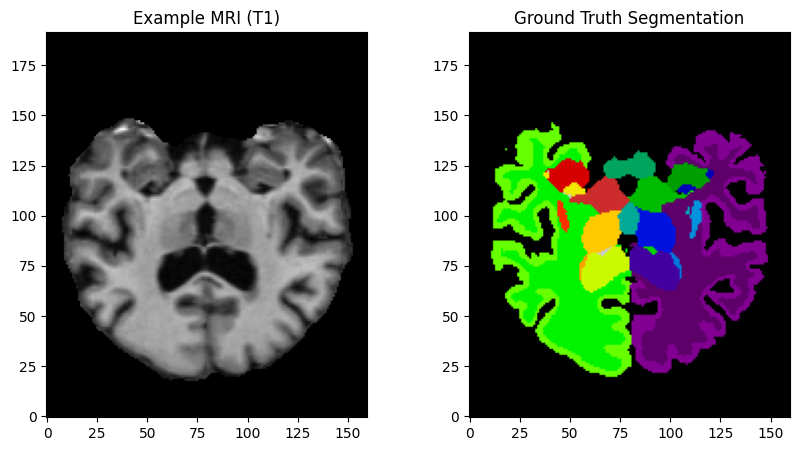

In [2]:

# 1. Download the lightweight 2D Neurite-OASIS dataset (approx 24MB)
url = "https://surfer.nmr.mgh.harvard.edu/ftp/data/neurite/data/neurite-oasis.2d.v1.0.tar"
tar_path = "neurite-oasis.2d.v1.0.tar"

if not os.path.exists(tar_path):
    print("Downloading dataset (24MB)...")
    urllib.request.urlretrieve(url, tar_path)
    print("Download complete.")

# 2. Extract one specific subject to serve as the example
# We will use subject 'OASIS_OAS1_0001_MR1'
subject_id = "OASIS_OAS1_0001_MR1"
output_dir = "student_data"
os.makedirs(output_dir, exist_ok=True)

print("Extracting example data...")
with tarfile.open(tar_path, "r") as tar:


    img_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_norm.nii.gz" in m.name][0]
    seg_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_seg24.nii.gz" in m.name][0]

    # Extract and rename for simplicity
    f_img = tar.extractfile(img_member)
    f_seg = tar.extractfile(seg_member)

    with open(os.path.join(output_dir, "image.nii.gz"), "wb") as out:
        out.write(f_img.read())
    with open(os.path.join(output_dir, "seg.nii.gz"), "wb") as out:
        out.write(f_seg.read())

print(f"Data ready in '{output_dir}/'. Files: image.nii.gz, seg.nii.gz")

# 3. Visualize the data
img = nib.load(os.path.join(output_dir, "image.nii.gz")).get_fdata().squeeze()
seg = nib.load(os.path.join(output_dir, "seg.nii.gz")).get_fdata().squeeze()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Example MRI (T1)")
plt.subplot(1, 2, 2)
plt.imshow(seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Ground Truth Segmentation")
plt.show()

In [3]:
# If you want to get access to the other data

subject_ids_in_tar = set()
 
with tarfile.open(tar_path, "r") as tar:
    for member in tar.getmembers():
        if "slice_norm.nii.gz" in member.name:
            # get formatted member name
            parts = member.name.split('/')
            if len(parts) > 0:
                subject_id = parts[0].split('_data')[0] # Get 'OASIS_OAS1_0001_MR1'
                subject_ids_in_tar.add(subject_id)

print(f"Total unique subjects found in the tar file: {len(subject_ids_in_tar)}")
print("Available Subject IDs:")
for sid in sorted(list(subject_ids_in_tar)): # Sort for consistent output
    print(f"- {sid}")


Total unique subjects found in the tar file: 414
Available Subject IDs:
- OASIS_OAS1_0001_MR1
- OASIS_OAS1_0002_MR1
- OASIS_OAS1_0003_MR1
- OASIS_OAS1_0004_MR1
- OASIS_OAS1_0005_MR1
- OASIS_OAS1_0006_MR1
- OASIS_OAS1_0007_MR1
- OASIS_OAS1_0009_MR1
- OASIS_OAS1_0010_MR1
- OASIS_OAS1_0011_MR1
- OASIS_OAS1_0012_MR1
- OASIS_OAS1_0013_MR1
- OASIS_OAS1_0014_MR1
- OASIS_OAS1_0015_MR1
- OASIS_OAS1_0016_MR1
- OASIS_OAS1_0017_MR1
- OASIS_OAS1_0018_MR1
- OASIS_OAS1_0019_MR1
- OASIS_OAS1_0020_MR1
- OASIS_OAS1_0021_MR1
- OASIS_OAS1_0022_MR1
- OASIS_OAS1_0023_MR1
- OASIS_OAS1_0025_MR1
- OASIS_OAS1_0026_MR1
- OASIS_OAS1_0027_MR1
- OASIS_OAS1_0028_MR1
- OASIS_OAS1_0029_MR1
- OASIS_OAS1_0030_MR1
- OASIS_OAS1_0031_MR1
- OASIS_OAS1_0032_MR1
- OASIS_OAS1_0033_MR1
- OASIS_OAS1_0034_MR1
- OASIS_OAS1_0035_MR1
- OASIS_OAS1_0037_MR1
- OASIS_OAS1_0038_MR1
- OASIS_OAS1_0039_MR1
- OASIS_OAS1_0040_MR1
- OASIS_OAS1_0041_MR1
- OASIS_OAS1_0042_MR1
- OASIS_OAS1_0043_MR1
- OASIS_OAS1_0044_MR1
- OASIS_OAS1_0045_MR1
- OA

# Segmentation

This code provides you a segmentation with 4 classes.

Data ready in 'student_data/'. Files: image.nii.gz, seg.nii.gz


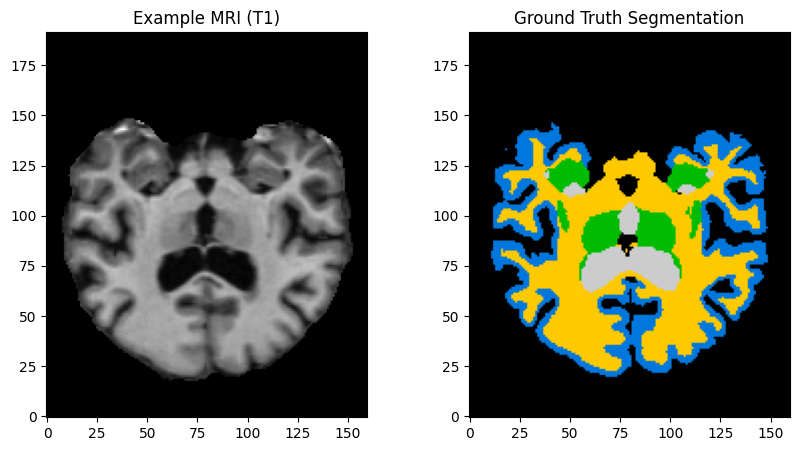

In [4]:
subject_id = "OASIS_OAS1_0001_MR1"
output_dir = "student_data"
os.makedirs(output_dir, exist_ok=True)

with tarfile.open(tar_path, "r") as tar:
    img_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_norm.nii.gz" in m.name][0]
    seg_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_seg4.nii.gz" in m.name][0]

    # Extract and rename for simplicity
    f_img = tar.extractfile(img_member)
    f_seg = tar.extractfile(seg_member)

    with open(os.path.join(output_dir, "image.nii.gz"), "wb") as out:
        out.write(f_img.read())
    with open(os.path.join(output_dir, "seg.nii.gz"), "wb") as out:
        out.write(f_seg.read())

print(f"Data ready in '{output_dir}/'. Files: image.nii.gz, seg.nii.gz")

# 3. Visualize the data
img = nib.load(os.path.join(output_dir, "image.nii.gz")).get_fdata().squeeze()
seg = nib.load(os.path.join(output_dir, "seg.nii.gz")).get_fdata().squeeze()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Example MRI (T1)")
plt.subplot(1, 2, 2)
plt.imshow(seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Ground Truth Segmentation")
plt.show()

There are plenty of classes for the segmentation. You can do a simpler segmentation where you have 4 labels (instead of 24). It's up to you.

## Methods

You have to do a segmentation of the previous image showed.
You need to use 2 different methods. Explain the differences between these methods.

### List of possible methods (you can use other methods!) :

#### Multi-Otsu Thresholding

* [Reference](https://ieeexplore.ieee.org/document/4310076)

* [Python implementation](https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_multiotsu.html)
####   Gaussian Mixture Models (GMM)

* [Reference](https://towardsdatascience.com/gaussian-mixture-models-gmms-from-theory-to-implementation-4406c7fe9847/)

* [Python implementation](https://scikit-learn.org/stable/modules/mixture.html)
####   U-Net (Deep Learning)
* [Reference](https://arxiv.org/abs/1505.04597)
* Python implementation : use Pytorch

#### Random Walker
* [Reference](https://ieeexplore.ieee.org/document/1704833)
* [Python implementation](https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_random_walker_segmentation.html)



### Method 1: U-Net with 4 classes

In [58]:
import torch
import torch.nn as nn
import io
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import nibabel as nib
from nibabel.fileholders import FileHolder
import gzip
import tempfile

#### 1- Data separation

In [ ]:
## Separate data

subject_ids_in_tar = sorted(subject_ids_in_tar)

print(f'subject type {type(subject_ids_in_tar)}')
print(subject_ids_in_tar)
                
X_train, X_test_val, = train_test_split(subject_ids_in_tar, test_size=0.2)
X_val, X_test = train_test_split(X_test_val, test_size=0.5)

subject type <class 'list'>
['OASIS_OAS1_0001_MR1', 'OASIS_OAS1_0002_MR1', 'OASIS_OAS1_0003_MR1', 'OASIS_OAS1_0004_MR1', 'OASIS_OAS1_0005_MR1', 'OASIS_OAS1_0006_MR1', 'OASIS_OAS1_0007_MR1', 'OASIS_OAS1_0009_MR1', 'OASIS_OAS1_0010_MR1', 'OASIS_OAS1_0011_MR1', 'OASIS_OAS1_0012_MR1', 'OASIS_OAS1_0013_MR1', 'OASIS_OAS1_0014_MR1', 'OASIS_OAS1_0015_MR1', 'OASIS_OAS1_0016_MR1', 'OASIS_OAS1_0017_MR1', 'OASIS_OAS1_0018_MR1', 'OASIS_OAS1_0019_MR1', 'OASIS_OAS1_0020_MR1', 'OASIS_OAS1_0021_MR1', 'OASIS_OAS1_0022_MR1', 'OASIS_OAS1_0023_MR1', 'OASIS_OAS1_0025_MR1', 'OASIS_OAS1_0026_MR1', 'OASIS_OAS1_0027_MR1', 'OASIS_OAS1_0028_MR1', 'OASIS_OAS1_0029_MR1', 'OASIS_OAS1_0030_MR1', 'OASIS_OAS1_0031_MR1', 'OASIS_OAS1_0032_MR1', 'OASIS_OAS1_0033_MR1', 'OASIS_OAS1_0034_MR1', 'OASIS_OAS1_0035_MR1', 'OASIS_OAS1_0037_MR1', 'OASIS_OAS1_0038_MR1', 'OASIS_OAS1_0039_MR1', 'OASIS_OAS1_0040_MR1', 'OASIS_OAS1_0041_MR1', 'OASIS_OAS1_0042_MR1', 'OASIS_OAS1_0043_MR1', 'OASIS_OAS1_0044_MR1', 'OASIS_OAS1_0045_MR1', 'OASI

#### 2- U-Net model

In [ ]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)
    
    
class DownBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownBlock, self).__init__()
        self.double_conv = DoubleConv(in_channels, out_channels)
        self.down_sample = nn.MaxPool2d(2)

    def forward(self, x):
        skip_out = self.double_conv(x)
        down_out = self.down_sample(skip_out)
        return (down_out, skip_out)
    

class UpBlock(nn.Module):
    def __init__(self, in_channels, out_channels, up_sample_mode):
        super(UpBlock, self).__init__()
        if up_sample_mode == 'conv_transpose':
            self.up_sample = nn.ConvTranspose2d(in_channels-out_channels, in_channels-out_channels, kernel_size=2, stride=2)        
        elif up_sample_mode == 'bilinear':
            self.up_sample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            raise ValueError("Unsupported `up_sample_mode` (can take one of `conv_transpose` or `bilinear`)")
        self.double_conv = DoubleConv(in_channels, out_channels)

    def forward(self, down_input, skip_input):
        x = self.up_sample(down_input)
        x = torch.cat([x, skip_input], dim=1)
        return self.double_conv(x)
    

class UNet(nn.Module):
    def __init__(self, out_classes=4, up_sample_mode='conv_transpose'):
        super(UNet, self).__init__()
        self.up_sample_mode = up_sample_mode

        self.down_conv1 = DownBlock(3, 64)
        self.down_conv2 = DownBlock(64, 128)
        self.down_conv3 = DownBlock(128, 256)
        self.down_conv4 = DownBlock(256, 512)
        self.double_conv = DoubleConv(512, 1024)

        self.up_conv4 = UpBlock(512 + 1024, 512, self.up_sample_mode)
        self.up_conv3 = UpBlock(256 + 512, 256, self.up_sample_mode)
        self.up_conv2 = UpBlock(128 + 256, 128, self.up_sample_mode)
        self.up_conv1 = UpBlock(128 + 64, 64, self.up_sample_mode)

        self.conv_last = nn.Conv2d(64, out_classes, kernel_size=1)
        
    def forward(self, x):
        x, skip1_out = self.down_conv1(x)
        x, skip2_out = self.down_conv2(x)
        x, skip3_out = self.down_conv3(x)
        x, skip4_out = self.down_conv4(x)
        x = self.double_conv(x)
        x = self.up_conv4(x, skip4_out)
        x = self.up_conv3(x, skip3_out)
        x = self.up_conv2(x, skip2_out)
        x = self.up_conv1(x, skip1_out)
        x = self.conv_last(x)
        return x
    

model = UNet()

#### 3- Dataset loader

In [ ]:
class DatasetBuilder(Dataset):
    def __init__(self, tar_path, subjects):
        self.tar = tarfile.open(tar_path, "r")
        self.subject_ids = subjects
        self.members = self.tar.getmembers()
        
    def __len__(self):
        return len(self.subject_ids)

    def __getitem__(self, idx):
        print('inside get method')
        subject_id = self.subject_ids[idx]

        img_member = next(
            m for m in self.members
            if subject_id in m.name and "slice_norm.nii.gz" in m.name
        )
        seg_member = next(
            m for m in self.members
            if subject_id in m.name and "slice_seg24.nii.gz" in m.name
        )
        
        print(f'Before load_nii member', type(img_member))

        img = self.load_nii(img_member)
        seg = self.load_nii(seg_member)

        print(f"img {img}")
        
        # Normalize + tensorize
        img = torch.tensor(img, dtype=torch.float32).unsqueeze(0)
        seg = torch.tensor(seg, dtype=torch.long)
        
        return img, seg
    
    def load_nii(self, member):
        f = self.tar.extractfile(member)
        print(f'F type {type(f)}')
        compressed_data = f.read()
        
        with tempfile.NamedTemporaryFile(suffix='.nii.gz', delete=False) as tmp:
            tmp.write(compressed_data)
            tmp_path = tmp.name
        
        try:
            img = nib.load(tmp_path).get_fdata()
        finally:
            os.remove(tmp_path)
        
        return img


train_set = DatasetBuilder(tar_path, X_train)
val_set = DatasetBuilder(tar_path, X_val)

train_loader = DataLoader(train_set, batch_size=2, shuffle=True)
val_loader = DataLoader(val_set, batch_size=2)

#### 3- Training

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = UNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):
    model.train()
    train_loss = 0.0

    print(f"train loader", train_loader)
    
    for img, seg in train_loader:
        img, seg = img.to(device), seg.to(device)

        optimizer.zero_grad()
        
        # Error here caused by load_nii function
        pred = model(img)
        loss = criterion(pred, seg)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch {epoch+1}, Train loss: {train_loss:.4f}")

train loader <torch.utils.data.dataloader.DataLoader object at 0x11ab8d610>
inside get method
Before load_nii member <class 'tarfile.TarInfo'>
F type <class 'tarfile.ExFileObject'>
F type <class 'tarfile.ExFileObject'>
img [[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
inside get method
Before load_nii member <class 'tarfile.TarInfo'>
F type <class 'tarfile.ExFileObject'>
F type <class 'tarfile.ExFileObject'>
img [[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [2, 1, 160, 192, 1]

### Method 2

### Evaluation and results
Present your results and evaluate them with different metrics (for both methods). You need to use Dice coefficient and you can use other metrics (such as IoU) that you think are relevant. You can present other segmented images from 2D Neurite-OASIS dataset.

## Registration




This section focuses on image registration.  
The next cell provides a fixed image $I_{\text{fixed}}$ and a moving (floating) image $I_{\text{moving}}$.

You are required to implement two different registration methods in order to estimate a transformation $T$ such that:
$$
I_{\text{moving}} \circ T \approx I_{\text{fixed}}.
$$


This code creates a rigid transformation.

Generating Synthetic Data: Rotation=-3.76°, Shift=(0.90, 0.46)


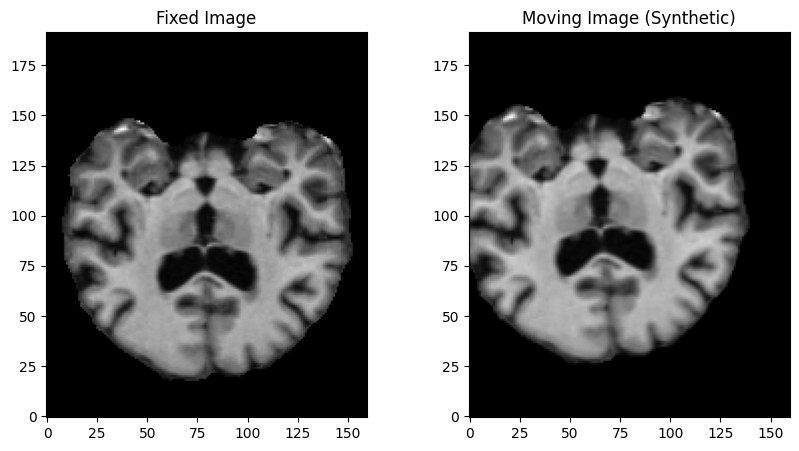

In [5]:
# rigid transformation
np.random.seed(42)
def create_synthetic_moving_data(fixed_img, fixed_seg, rotation_range=15, shift_range=1):
    """
    Creates a 'Moving' image by applying a random affine transform
    (rotation + translation) to the Fixed image.
    """
    # 1. Generate random parameters
    angle_deg = np.random.uniform(-rotation_range, rotation_range)
    shift_y = np.random.uniform(-shift_range, shift_range)
    shift_x = np.random.uniform(-shift_range, shift_range)

    print(f"Generating Synthetic Data: Rotation={angle_deg:.2f}°, Shift=({shift_y:.2f}, {shift_x:.2f})")

    # 2. Define the Affine Matrix (Inverse mapping is usually required for scipy)
    # Convert to radians
    theta = np.radians(angle_deg)
    c, s = np.cos(theta), np.sin(theta)

    # Rotation matrix (centered usually requires offset handling,
    # but for simple tasks, direct matrix application is often sufficient
    # if we ignore center-of-rotation artifacts or handle them via 'offset')

    # To rotate around center, we often shift center to origin -> rotate -> shift back.
    # Here we simplify:
    center = np.array(fixed_img.shape) / 2.0
    rotation_mat = np.array([[c, -s], [s, c]])
    offset = center - center.dot(rotation_mat) + np.array([shift_y, shift_x])

    # 3. Apply transformation
    # We use spline interpolation (order=1) for the image
    moving_img = affine_transform(
        fixed_img,
        matrix=rotation_mat,
        offset=offset,
        order=1,
        mode='constant'
    )

    # We use nearest neighbor (order=0) for the segmentation (labels must remain integers)
    moving_seg = affine_transform(
        fixed_seg,
        matrix=rotation_mat,
        offset=offset,
        order=0,
        mode='constant'
    )

    return moving_img, moving_seg

# --- Usage Example ---
# Create the moving image
moving_img, moving_seg = create_synthetic_moving_data(img, seg)

# Visualize Fixed vs Moving
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Fixed Image")
plt.subplot(1, 2, 2)
plt.imshow(moving_img.T, cmap='gray', origin='lower')
plt.title("Moving Image (Synthetic)")
plt.show()

Add a non-rigid transformation to the moving image.

Now, implement 2 different methods of registration

### List of possible methods (you can use other methods!) :

#### Phase Correlation / Fourier Shift Theorem
* [Reference](https://en.wikipedia.org/wiki/Phase_correlation)
* [Python implementation](https://scikit-image.org/docs/stable/api/skimage.registration.html)

#### Mutual Information Maximization
* [Reference](https://link.springer.com/article/10.1023/A:1007958904918)
* [Python implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) (requires coding the MI loss function)

#### VoxelMorph
* [Reference](https://arxiv.org/abs/1809.05231)
* [Python implementation](https://github.com/voxelmorph/voxelmorph)

#### B-Spline Free Form Deformation
* [Reference](https://ieeexplore.ieee.org/document/796284)
* [Python implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RectBivariateSpline.html)



### Method 1

### Method 2

Present the results and evaluate them using multiple metrics for both methods. Report the Dice coefficient and, where appropriate, include other relevant measures (for example, Intersection over Union — IoU). Additionally, you may present other registration examples to illustrate the effectiveness of your methods.